In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds


 HF_balanced


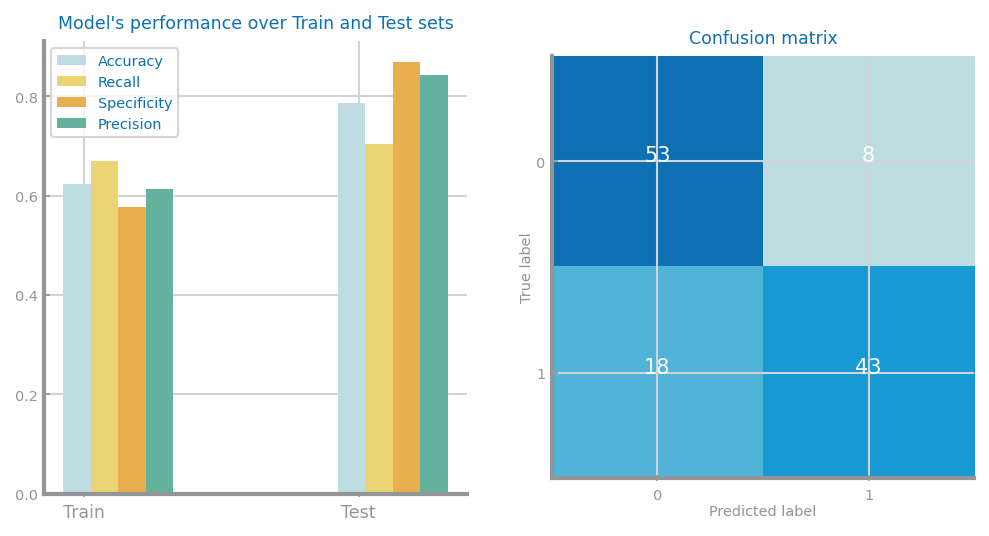

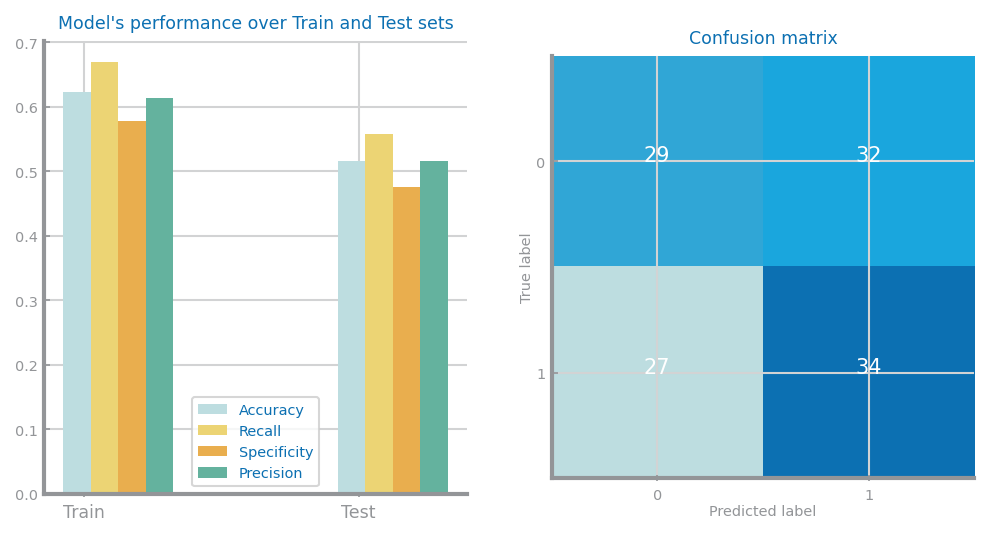

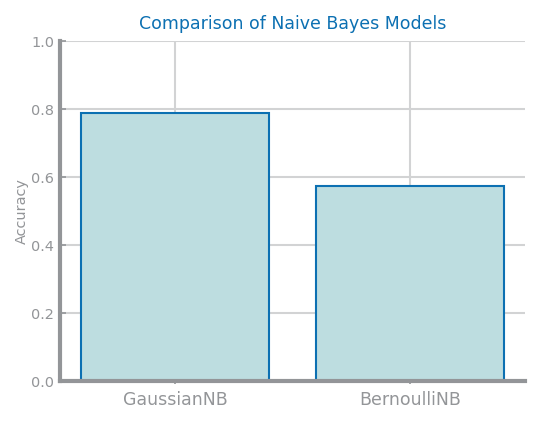


 HF_S_FAnova_extra_outlierTrim_IQS_B


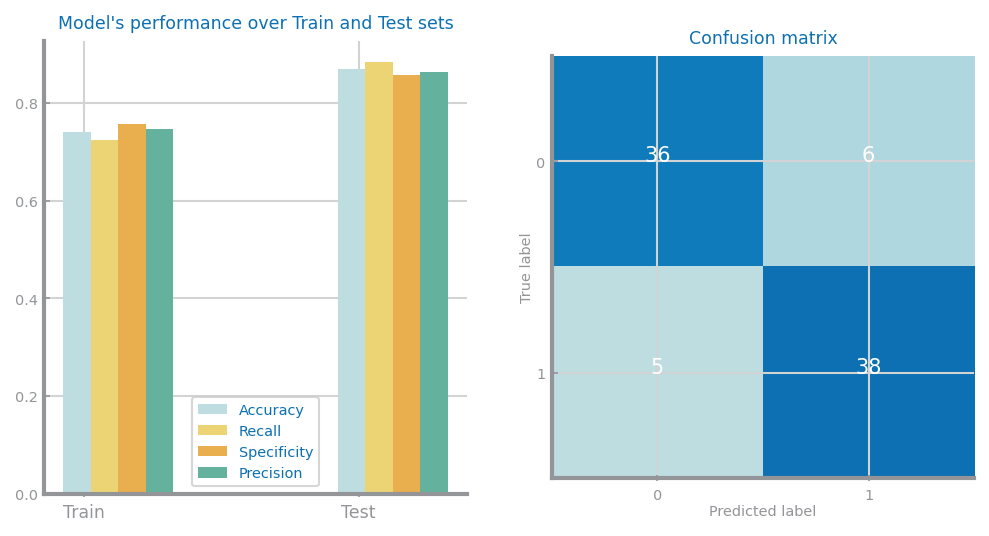

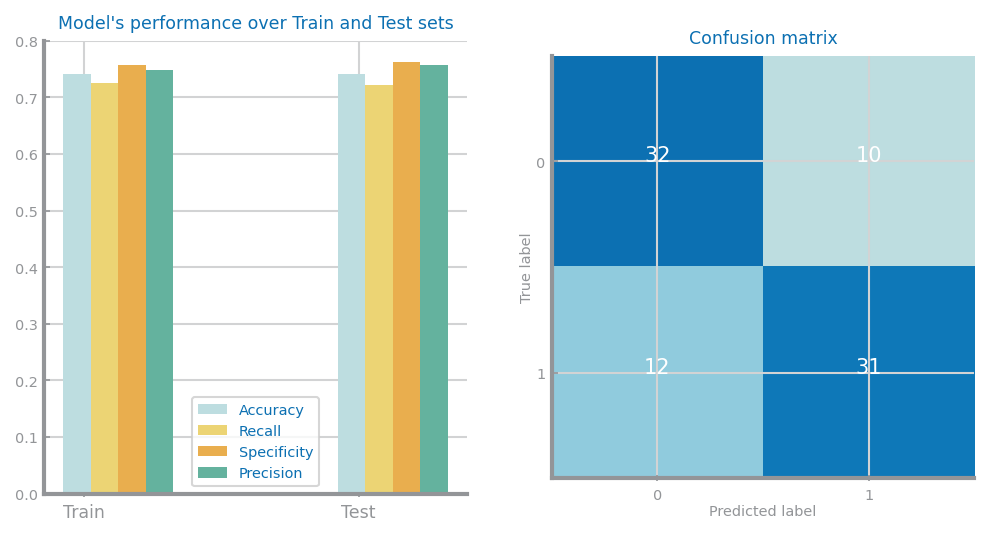

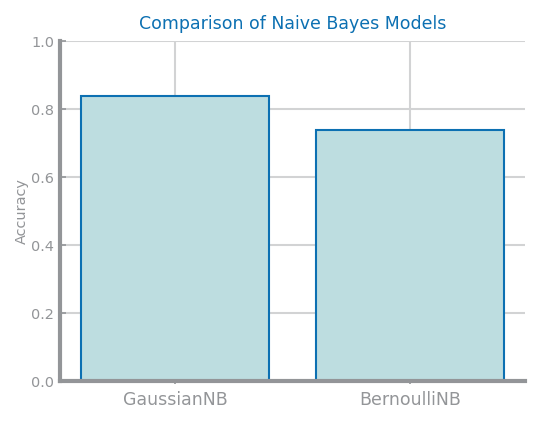


 HF_S_FAnova_outlierTrim_IQS_B


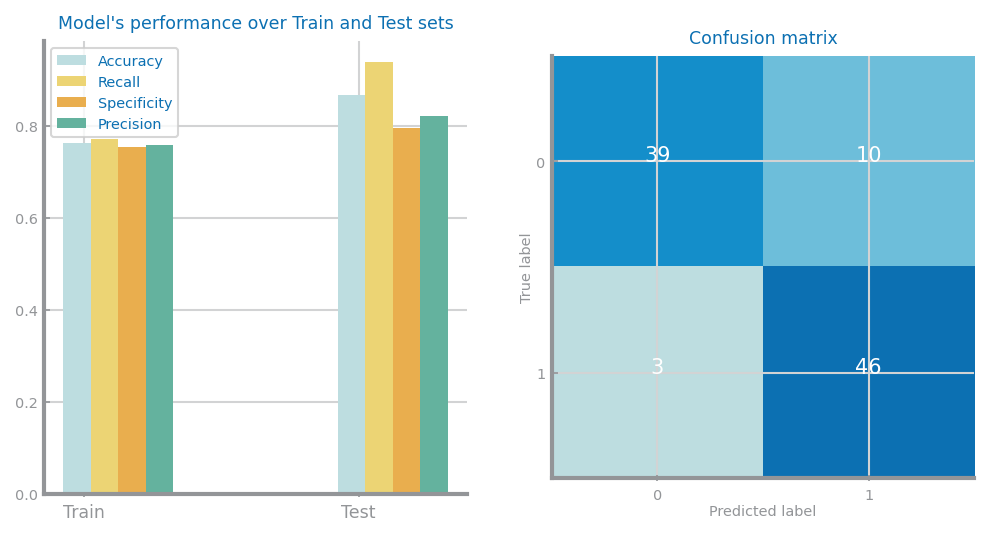

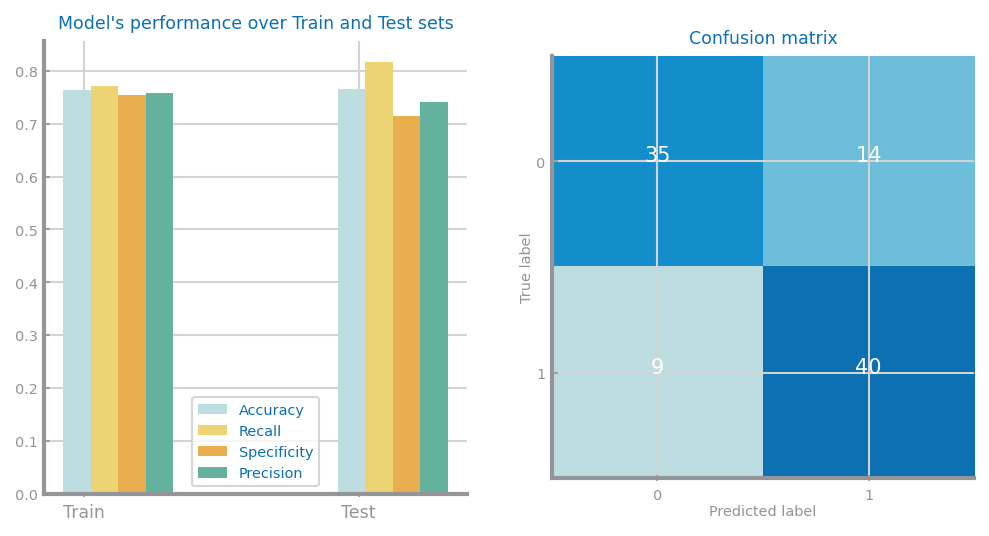

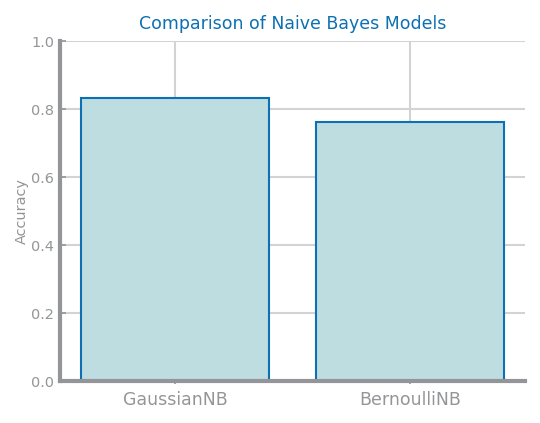


 HR_standardized_anova


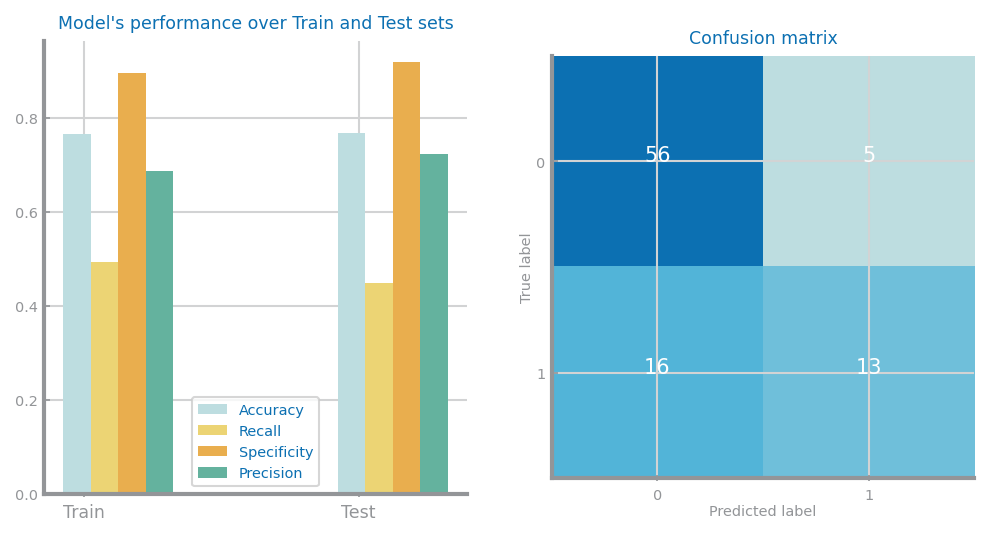

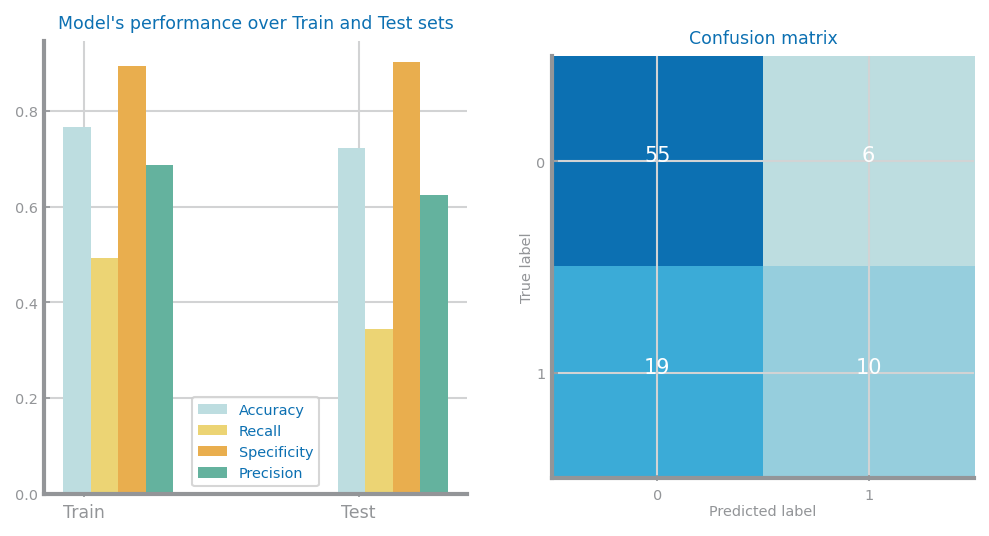

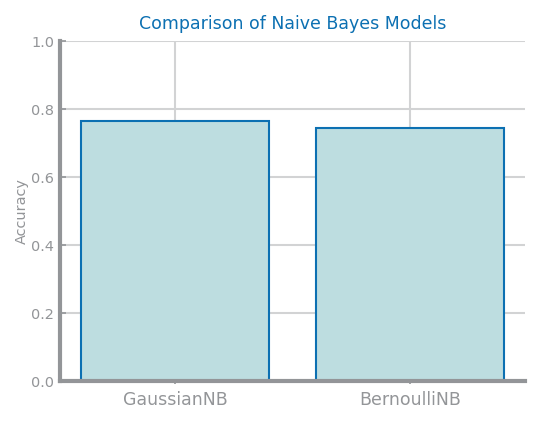


 HR_standardized_corr


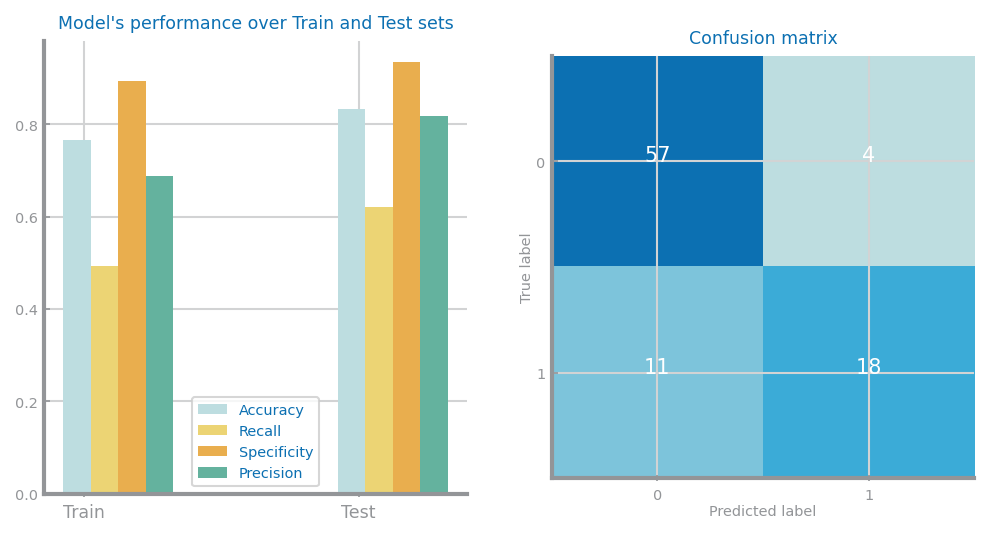

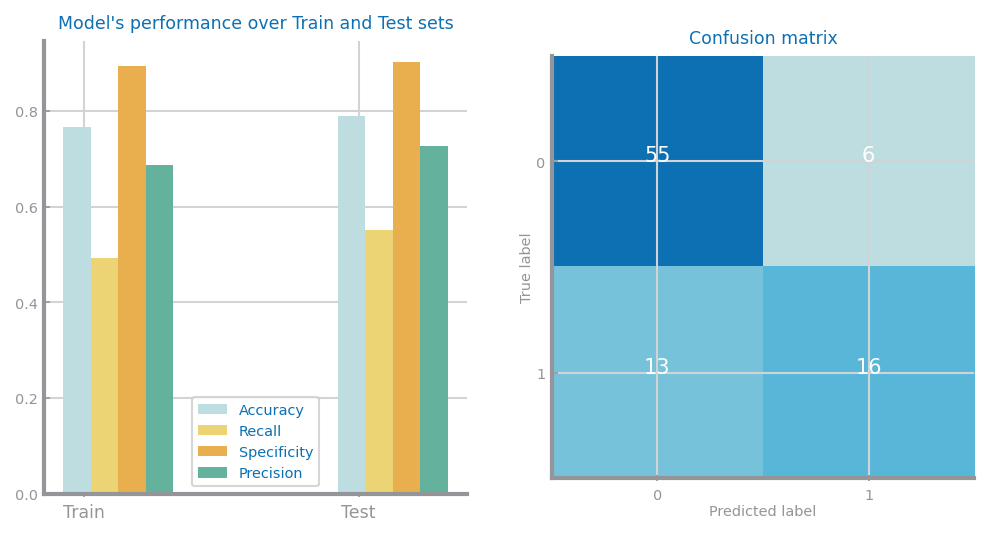

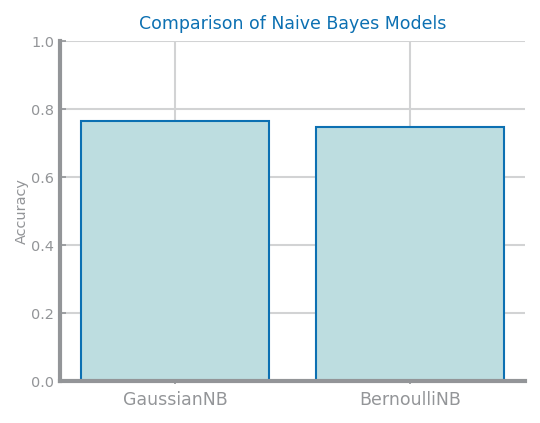


 HR_standardized_extra


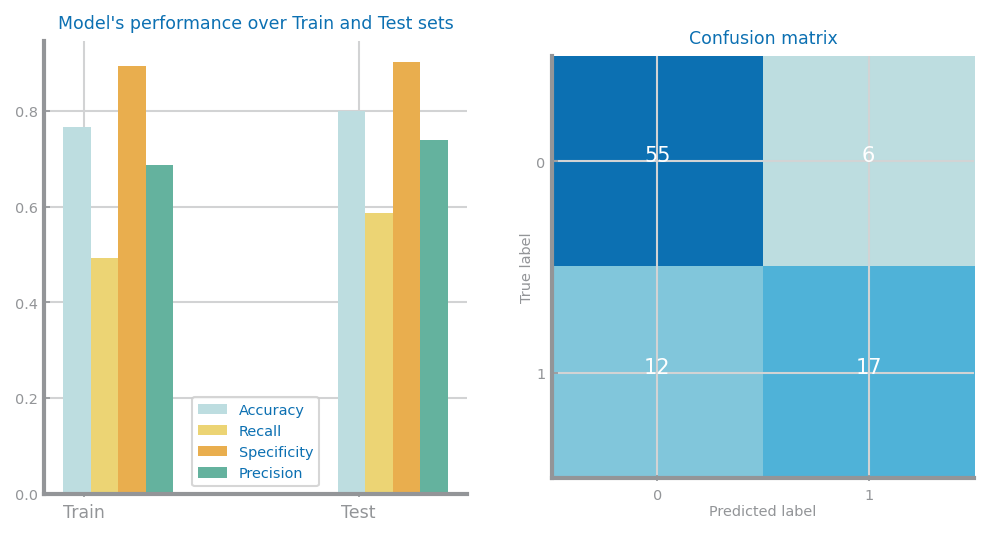

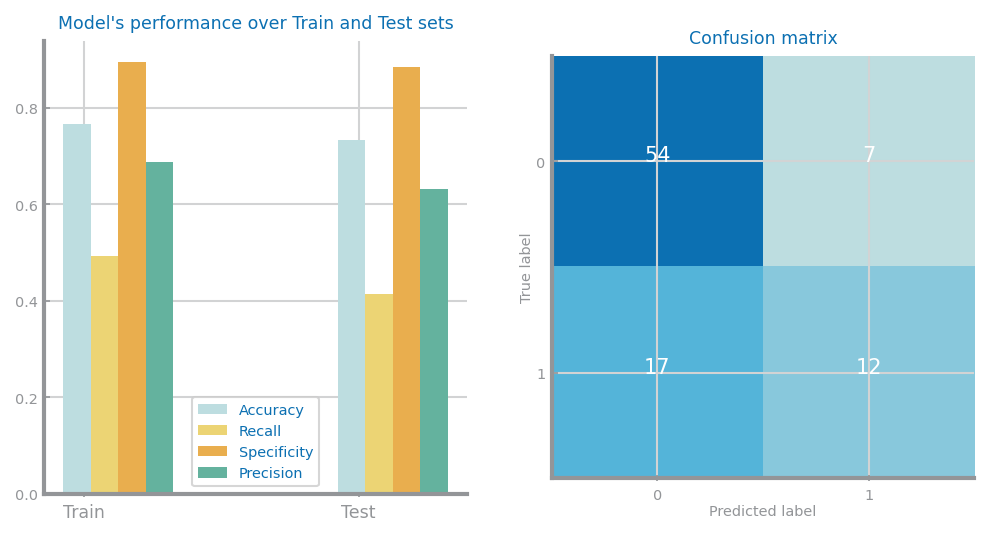

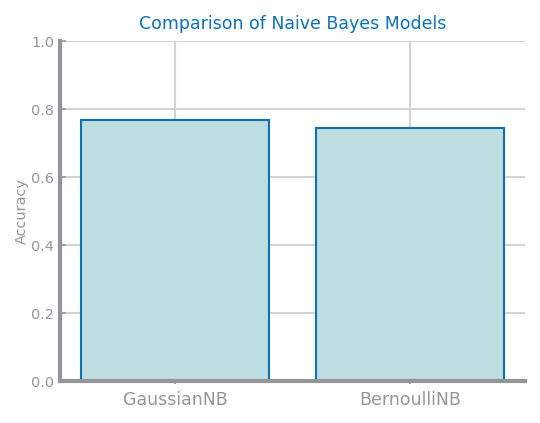


 HR_standardized_extraTreeClassifier


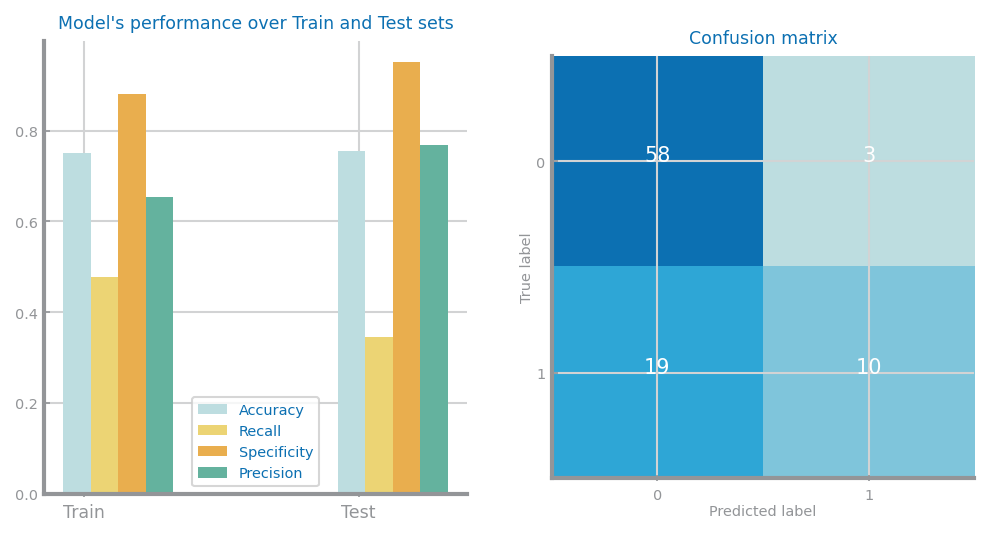

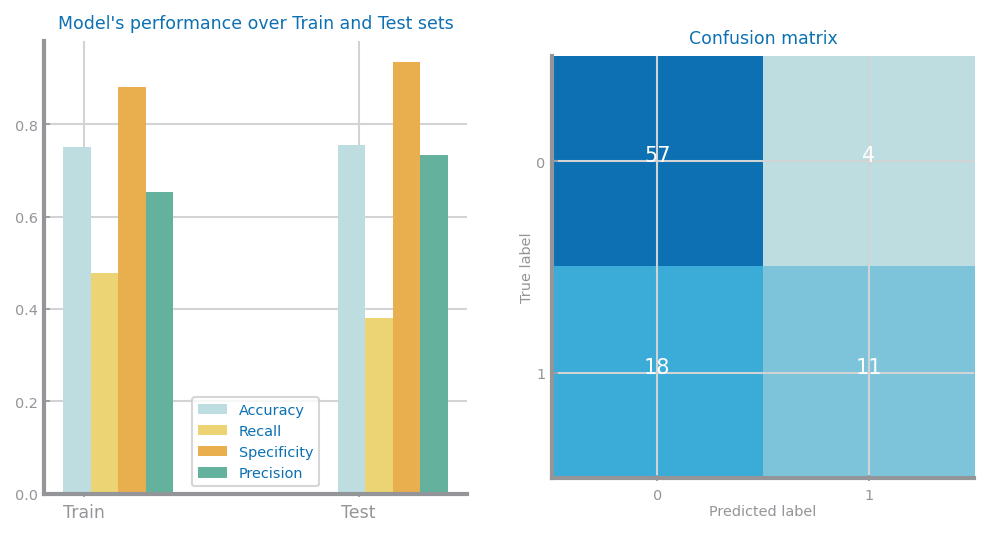

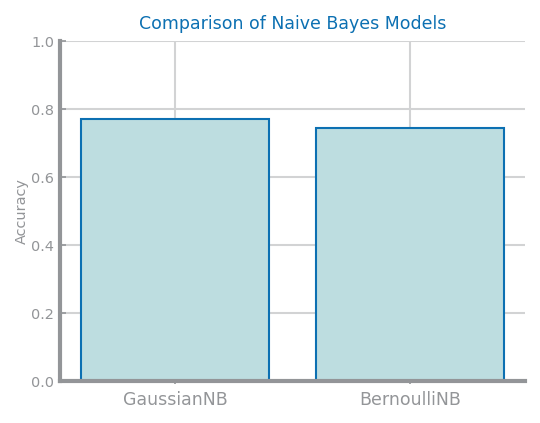


 HR_standardized_extra_anova


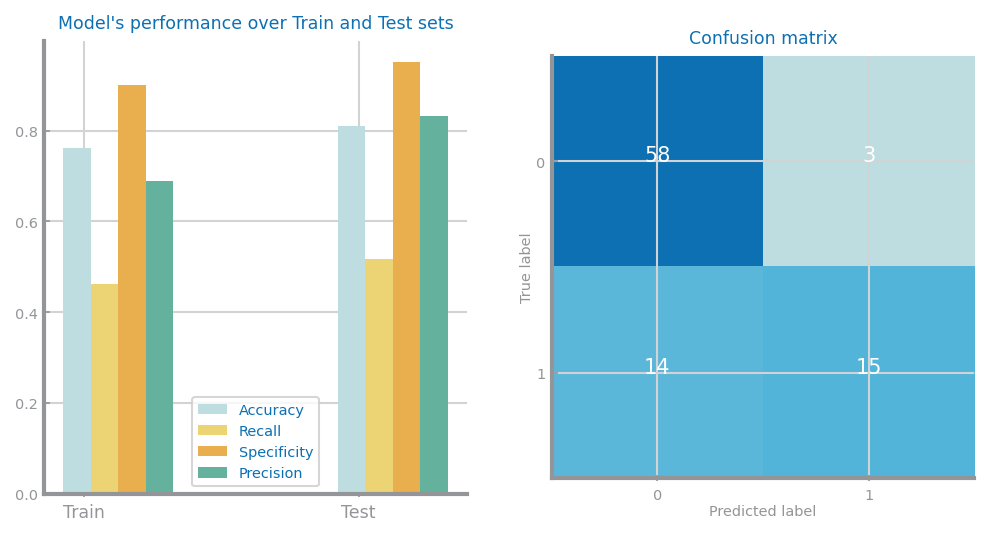

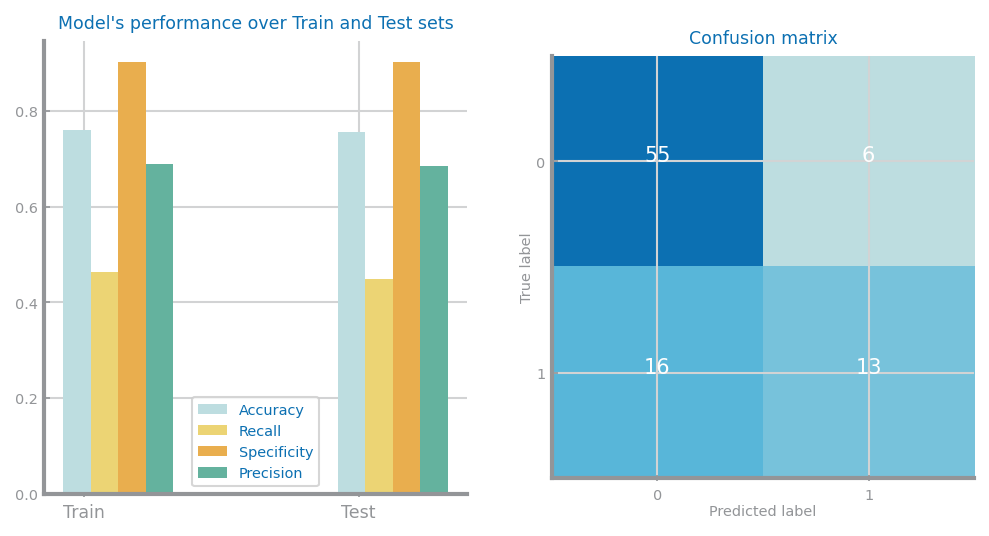

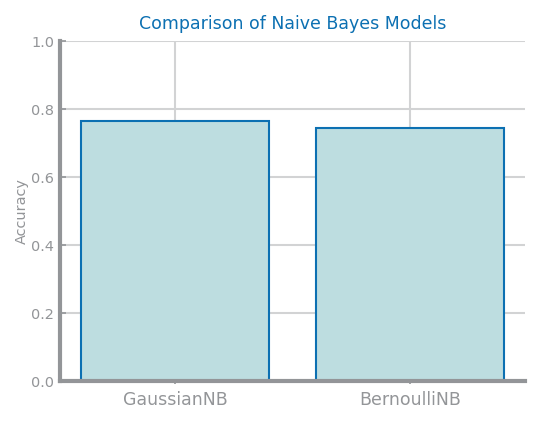


 HR_standardized_extra_lasso


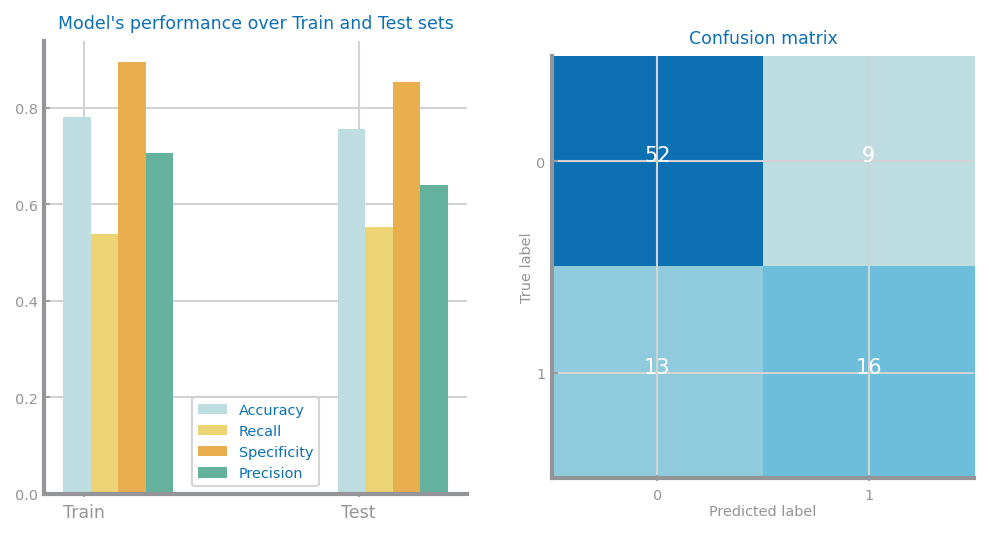

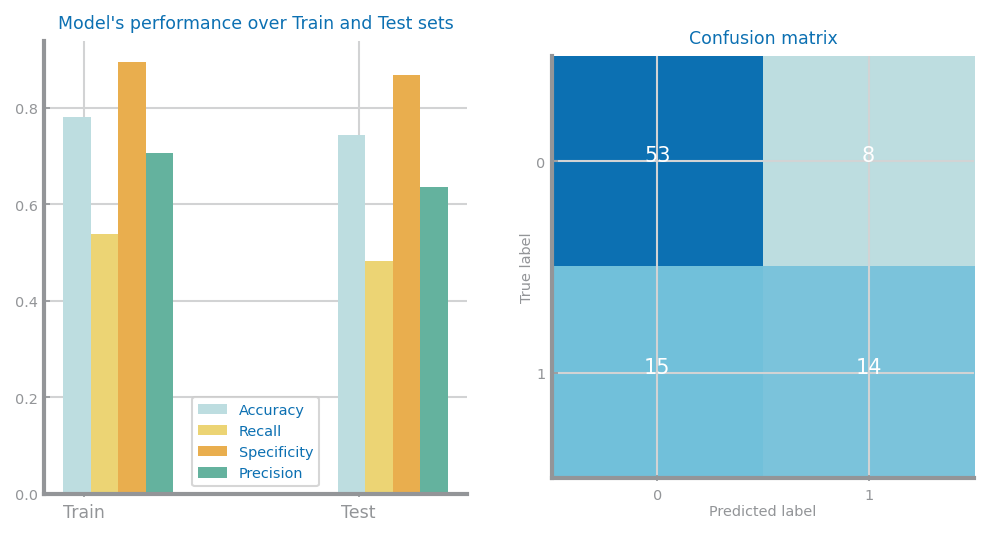

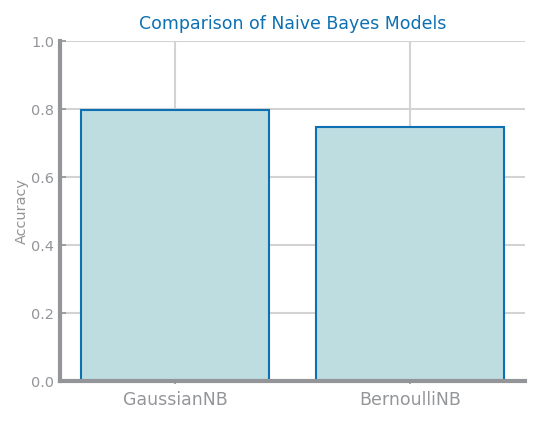


 HR_standardized_extra_mixed


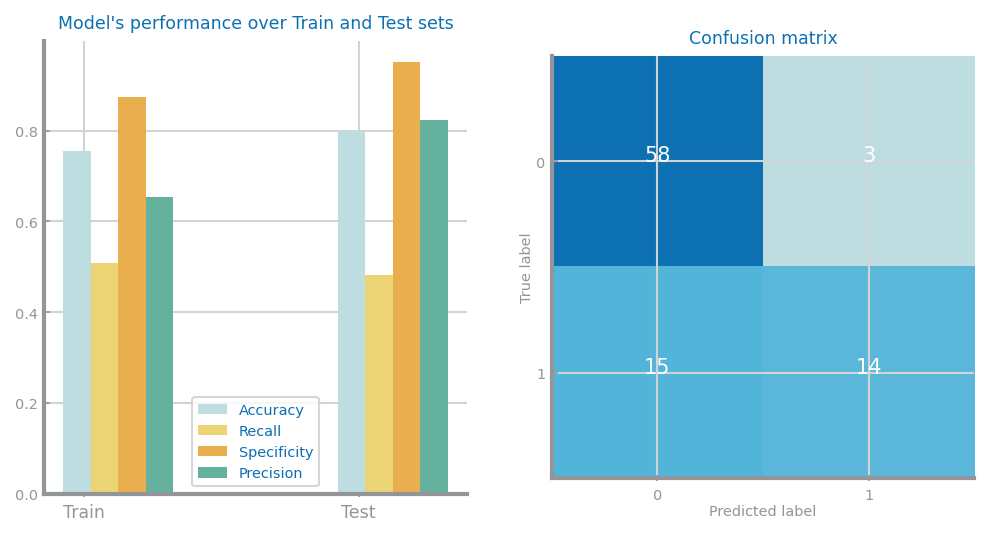

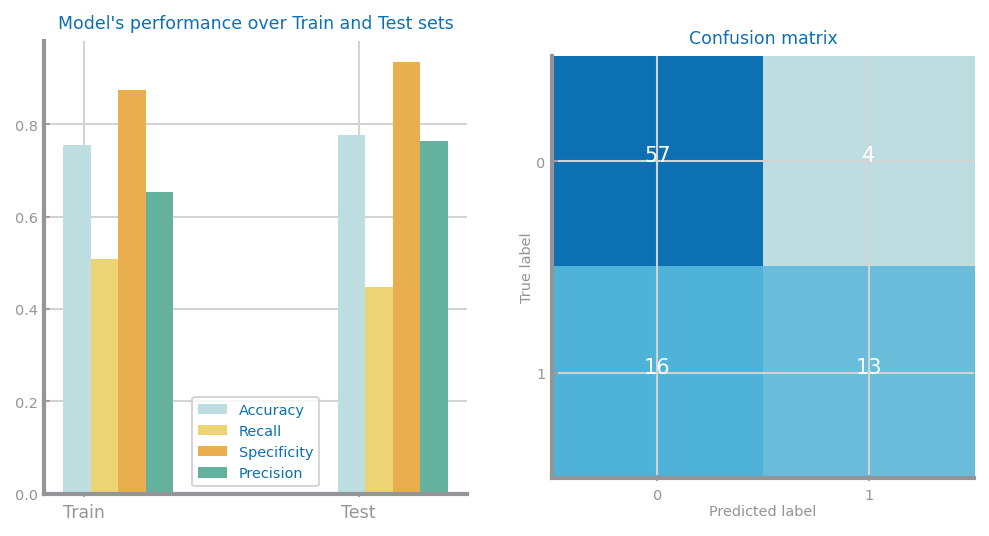

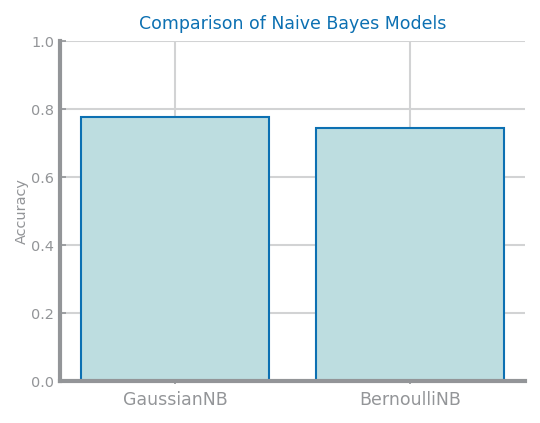


 HR_standardized_extra_rfe


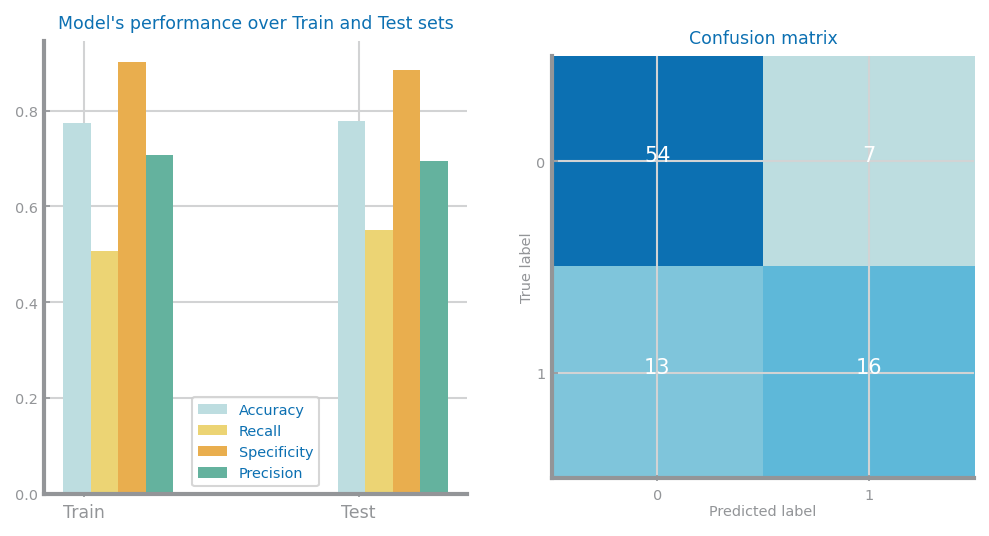

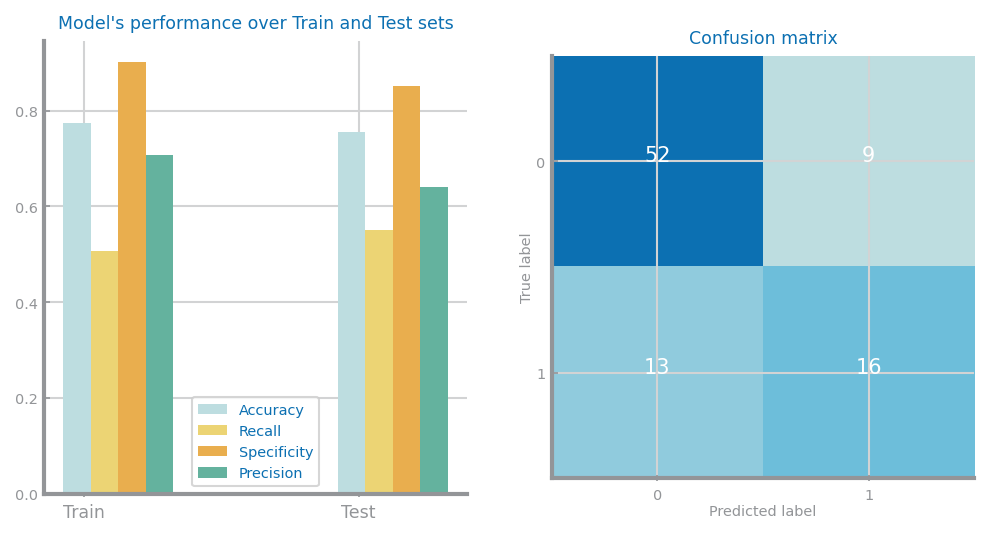

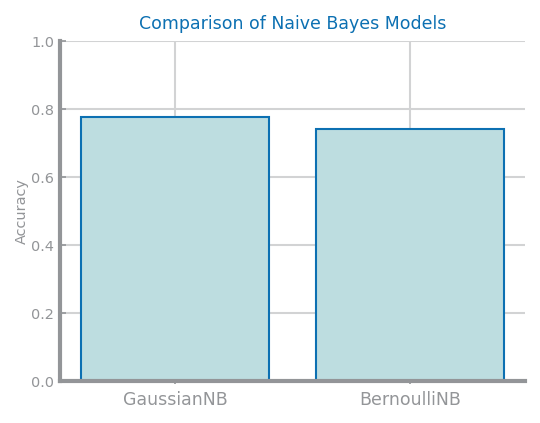


 HR_standardized_lasso


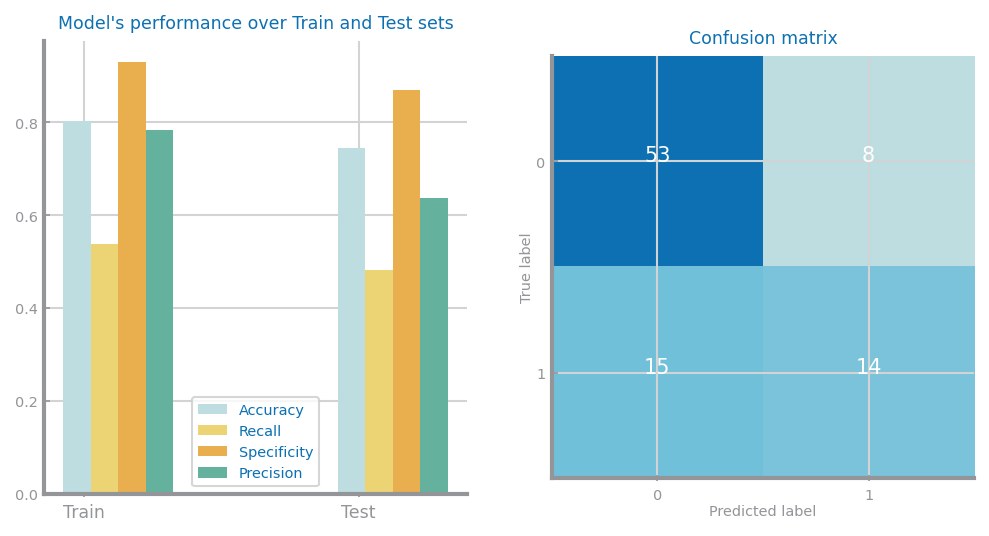

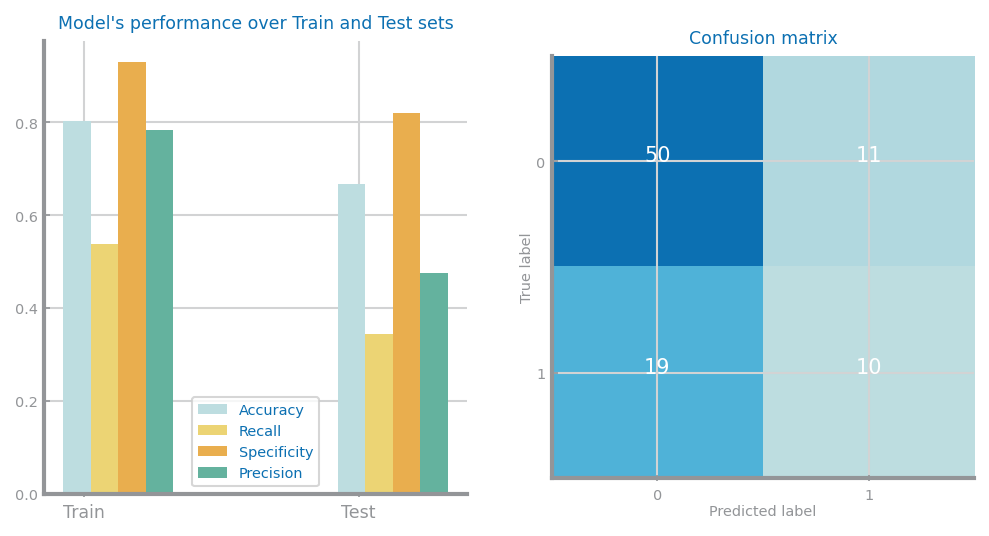

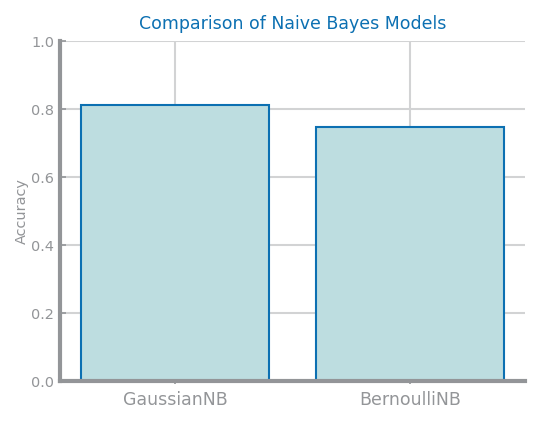


 HR_standardized_mixed


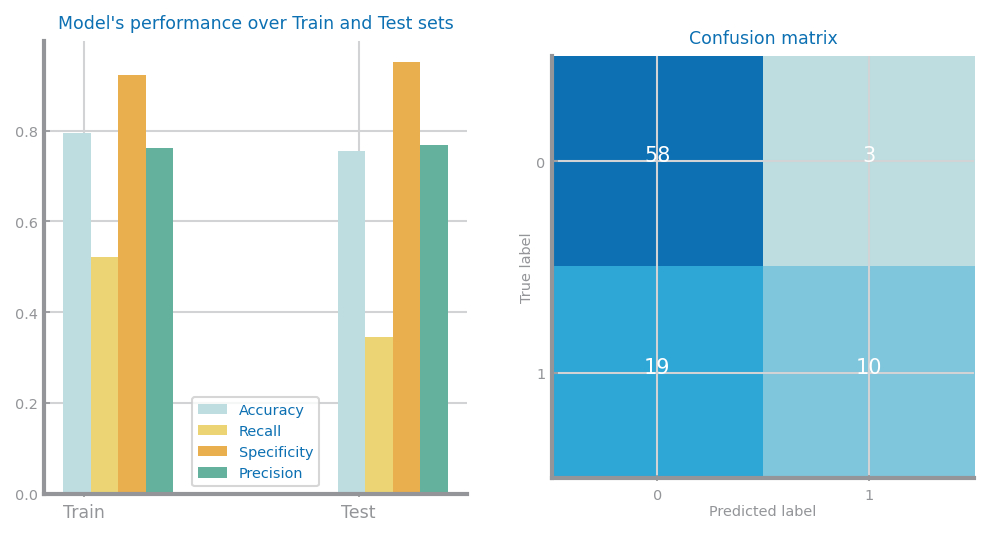

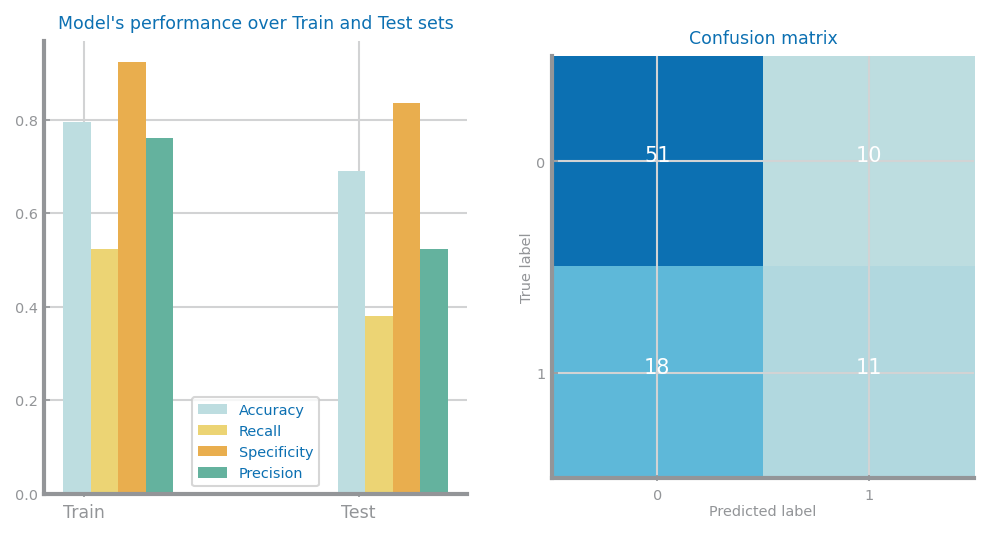

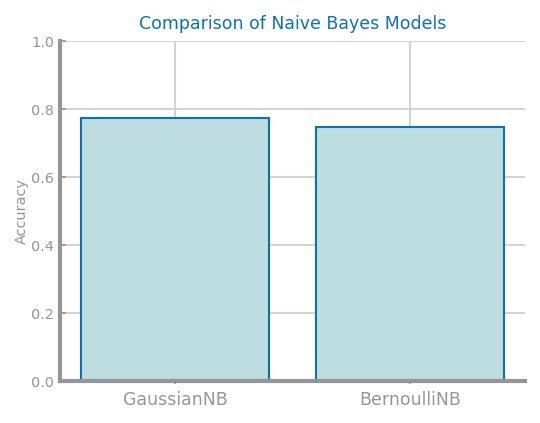


 HR_standardized_rfe


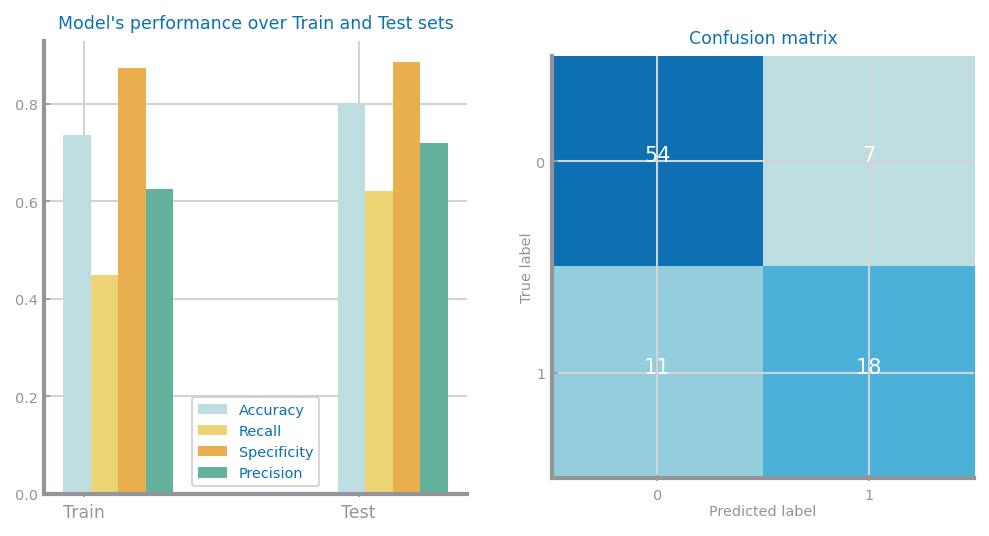

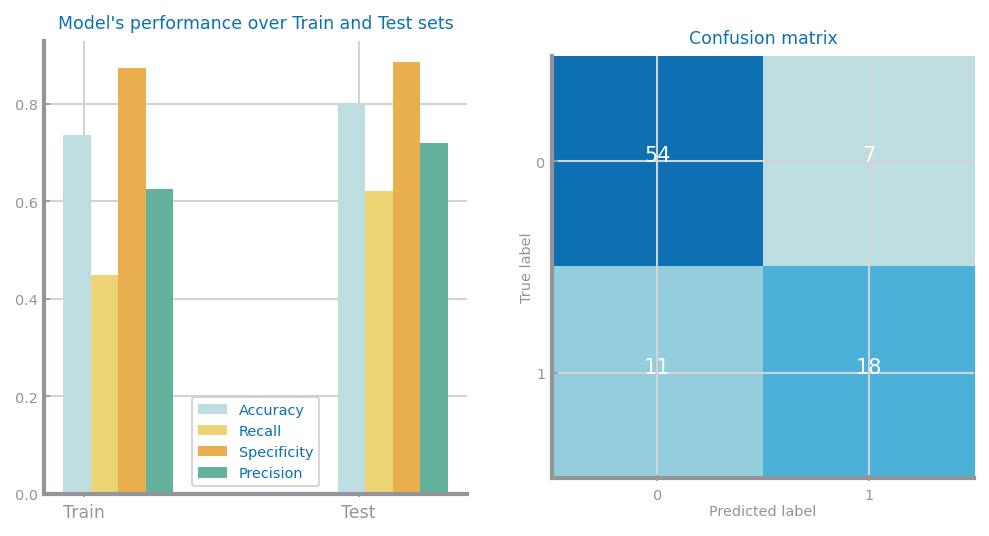

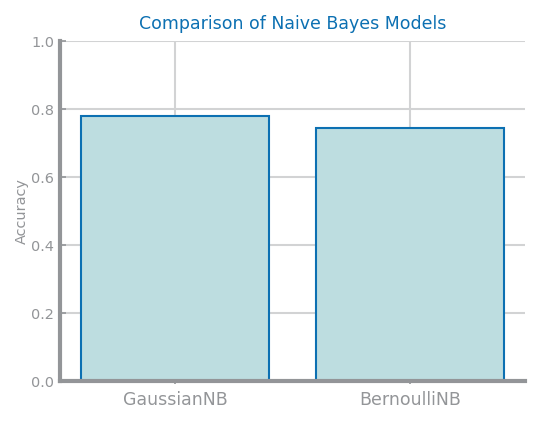


 HR_S_FCorr_extra_outlierTrim_IQS_B


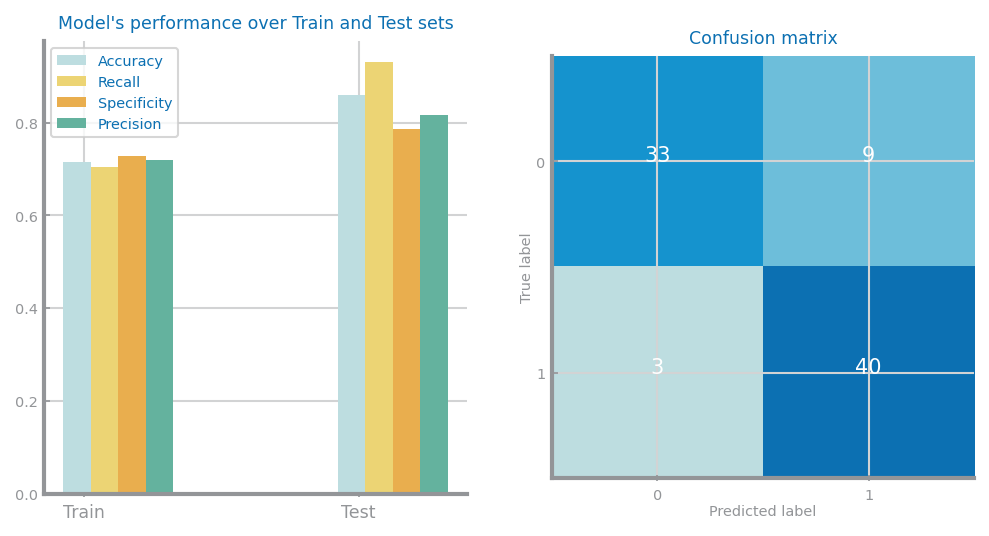

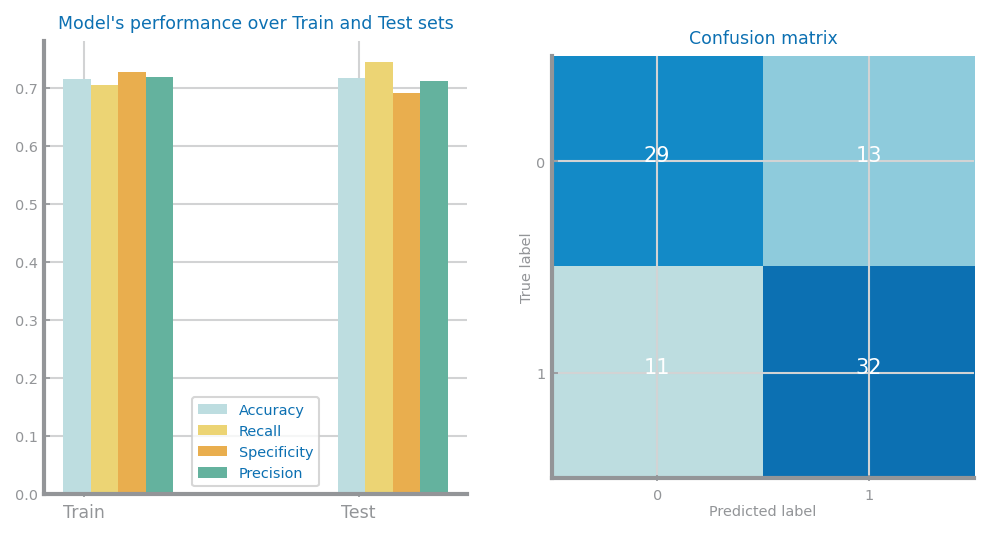

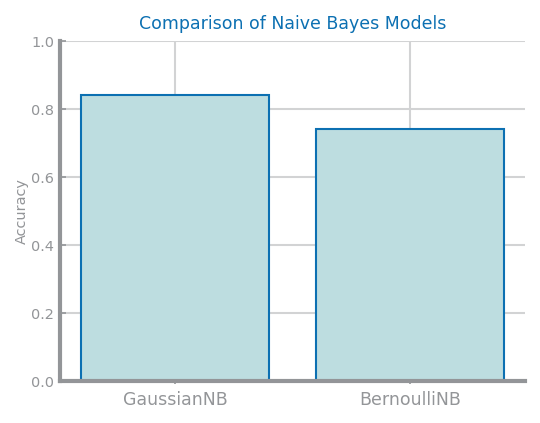


 HR_S_FCorr_outlierTrim_IQS_B


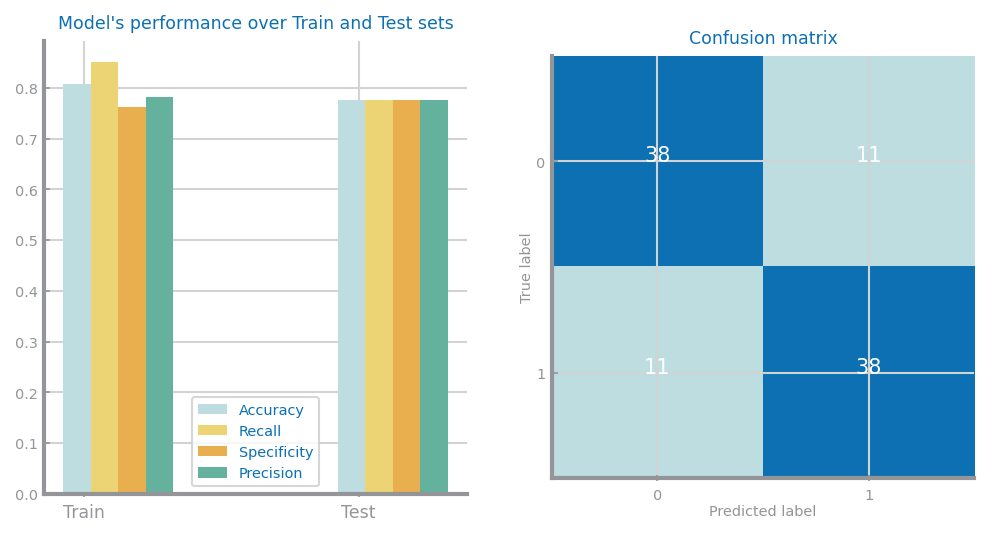

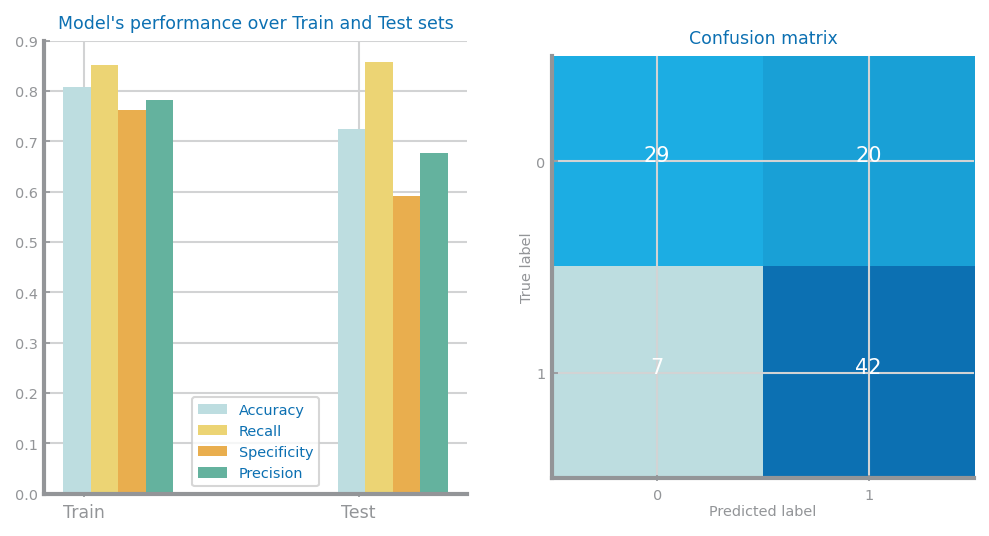

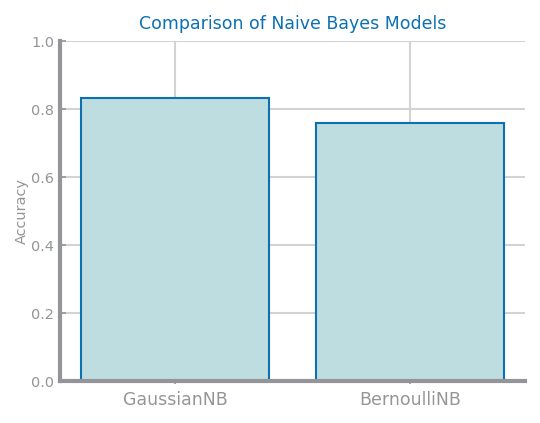


 HR_S_FImp_extra_outlierTrim_IQS_B


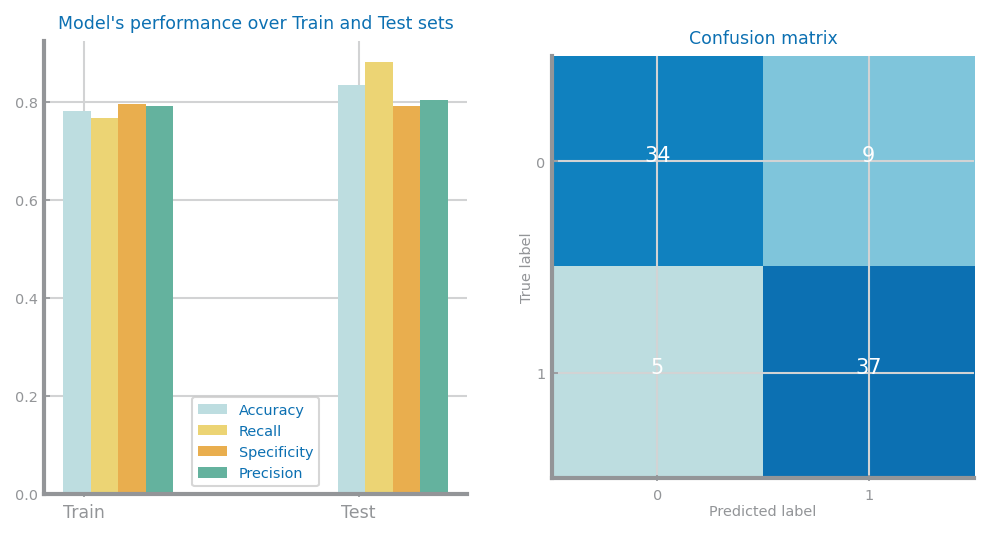

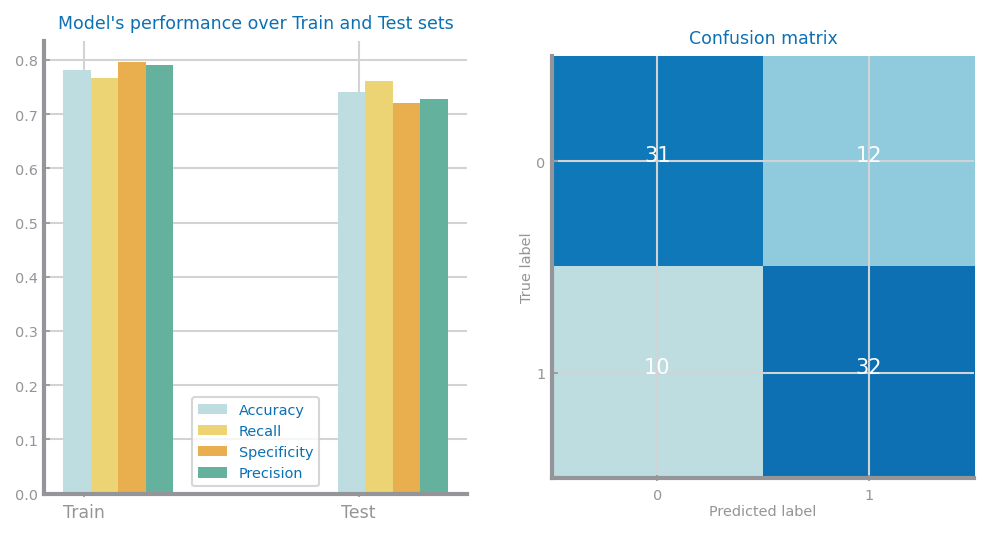

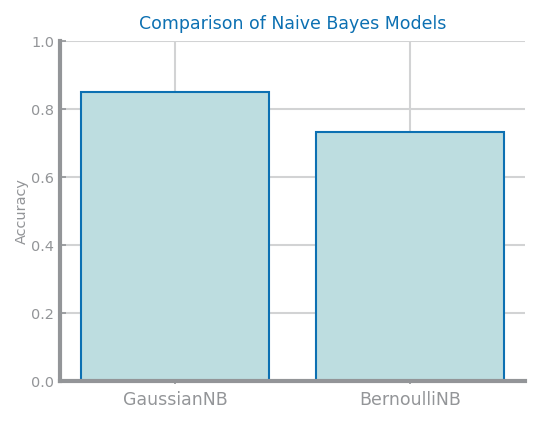


 HR_S_FImp_outlierTrim_IQS_B


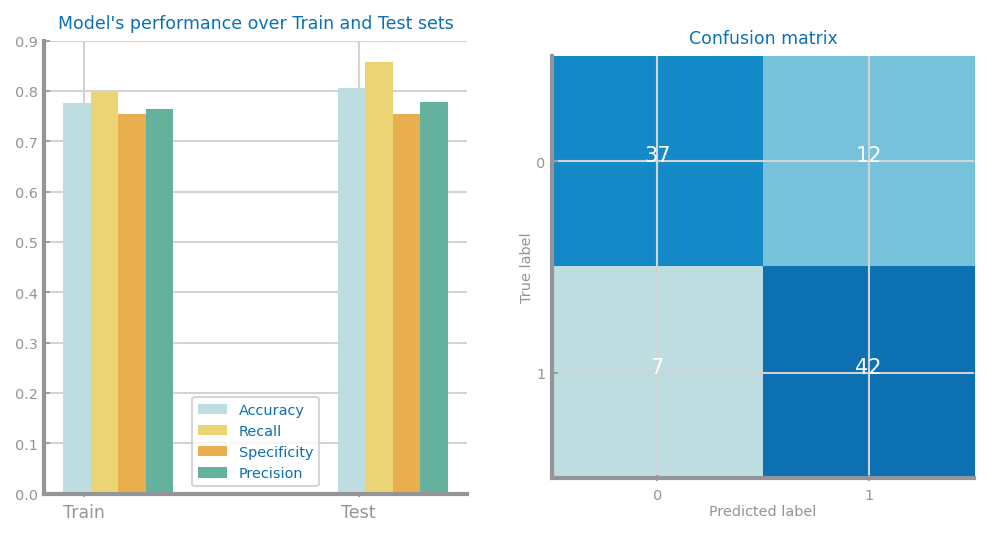

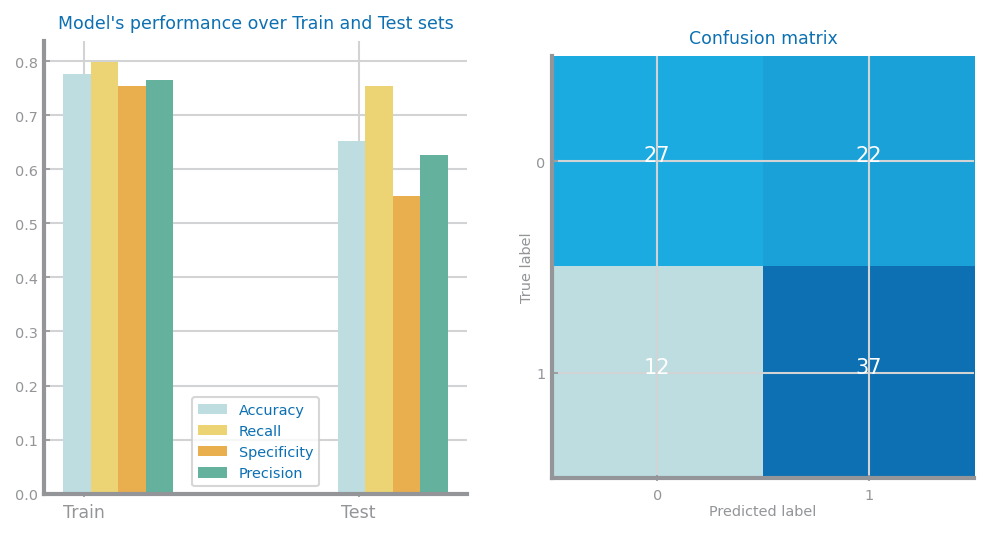

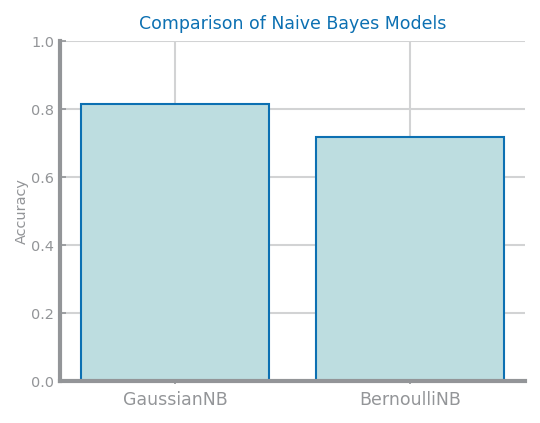


 HR_S_FMixed_extra_outlierTrim_IQS_B


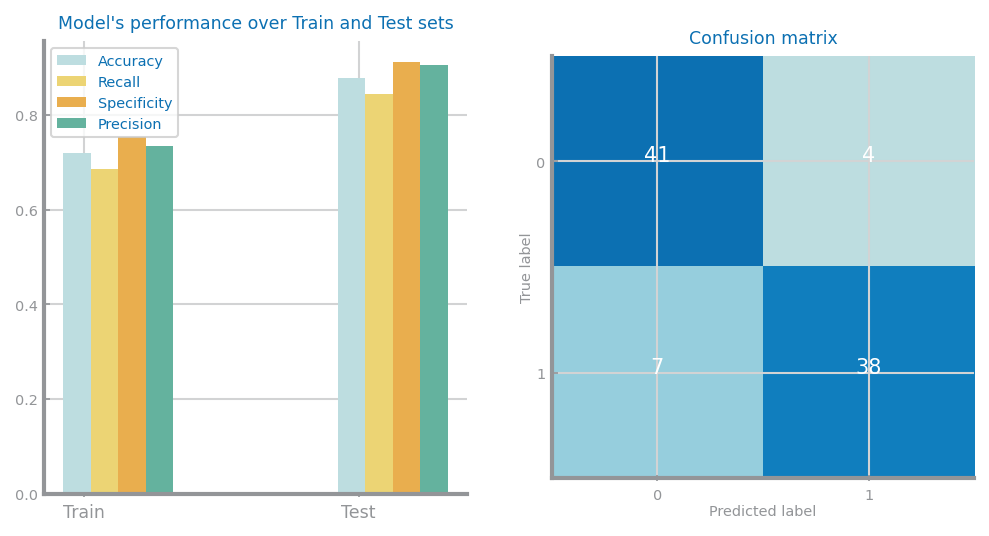

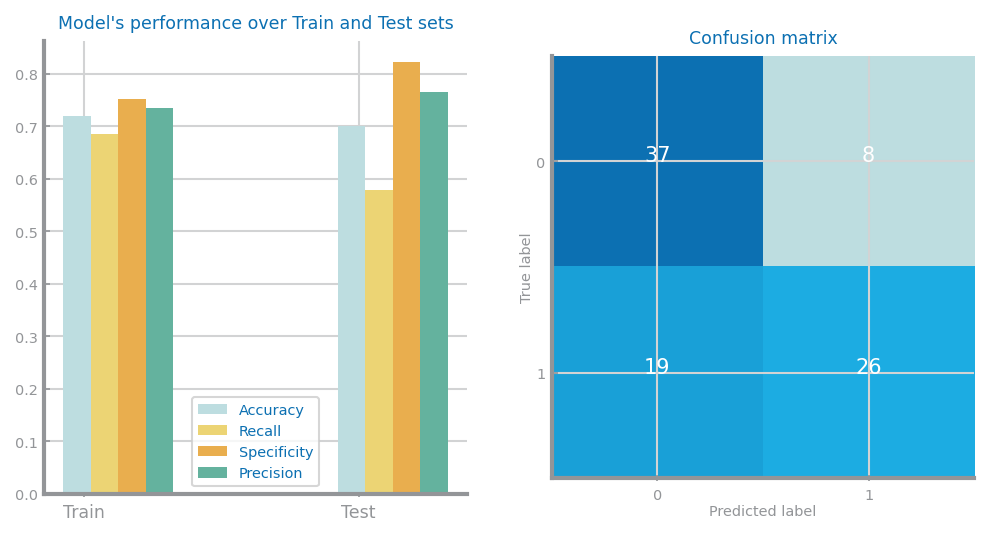

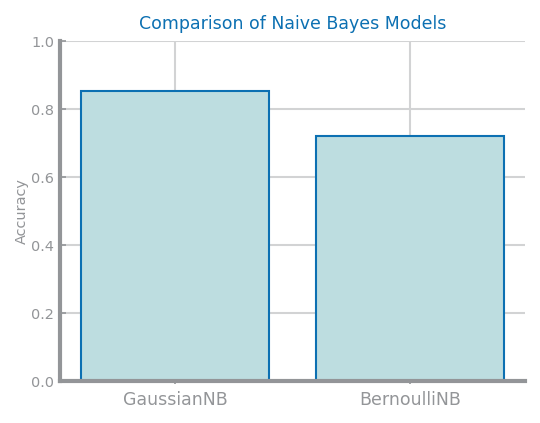


 HR_S_FMixed_outlierTrim_IQS_B


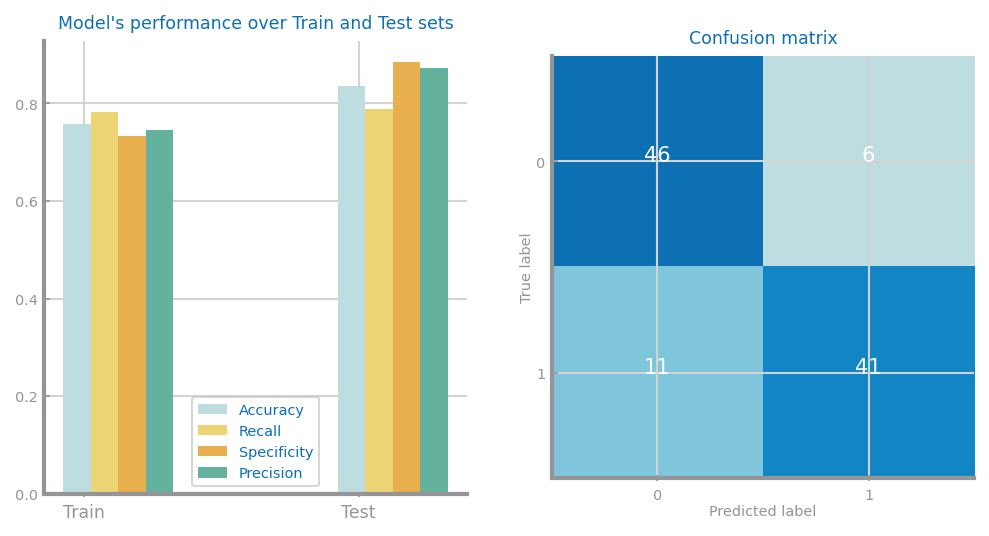

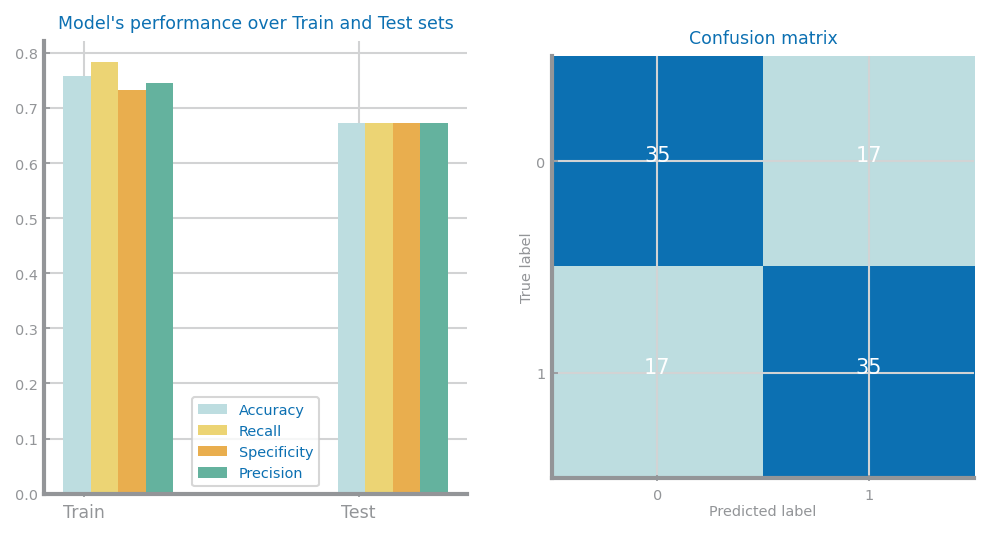

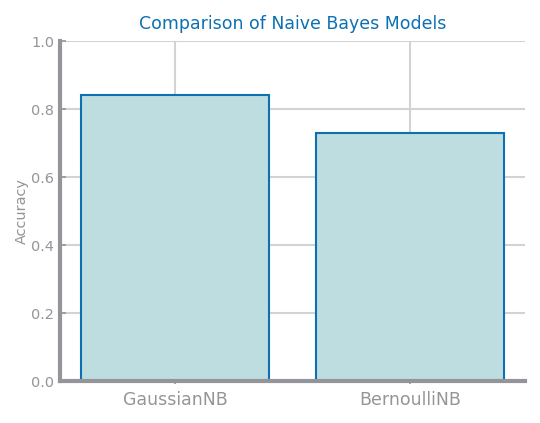


 HR_S_FRFE_extra_outlierTrim_IQS_B


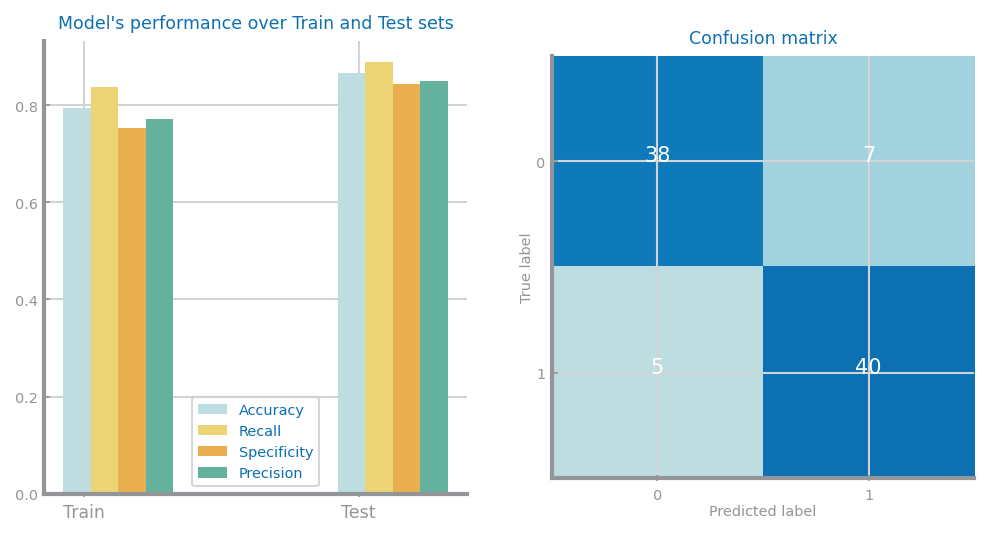

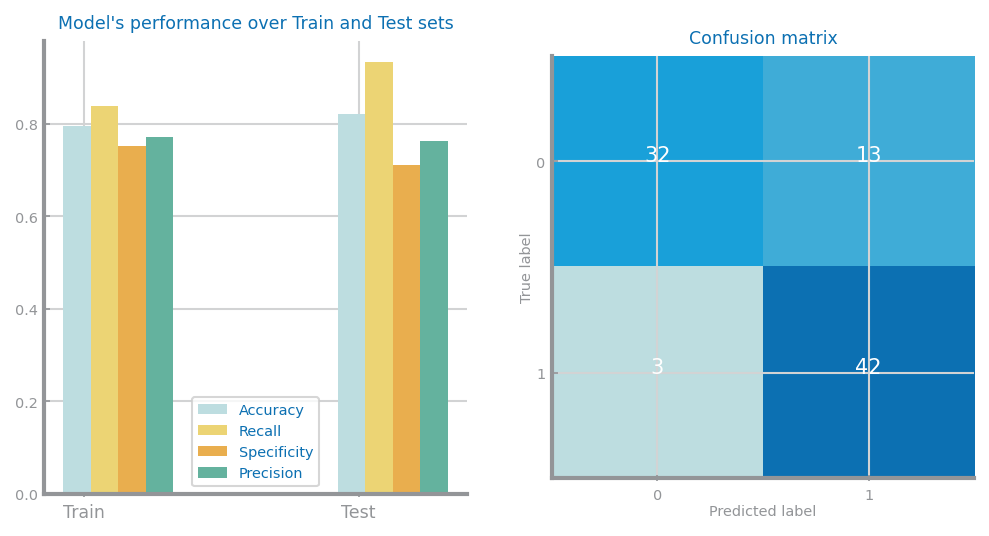

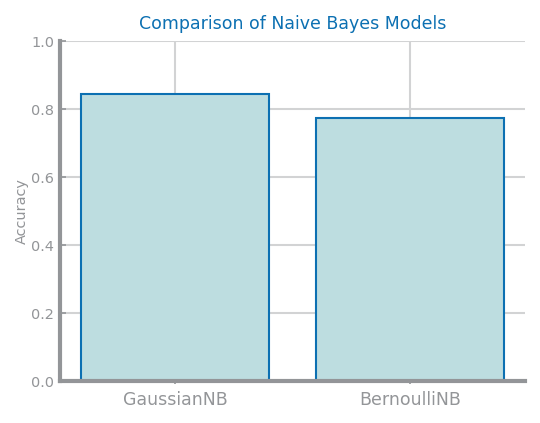


 HR_S_FRFE_outlierTrim_IQS_B


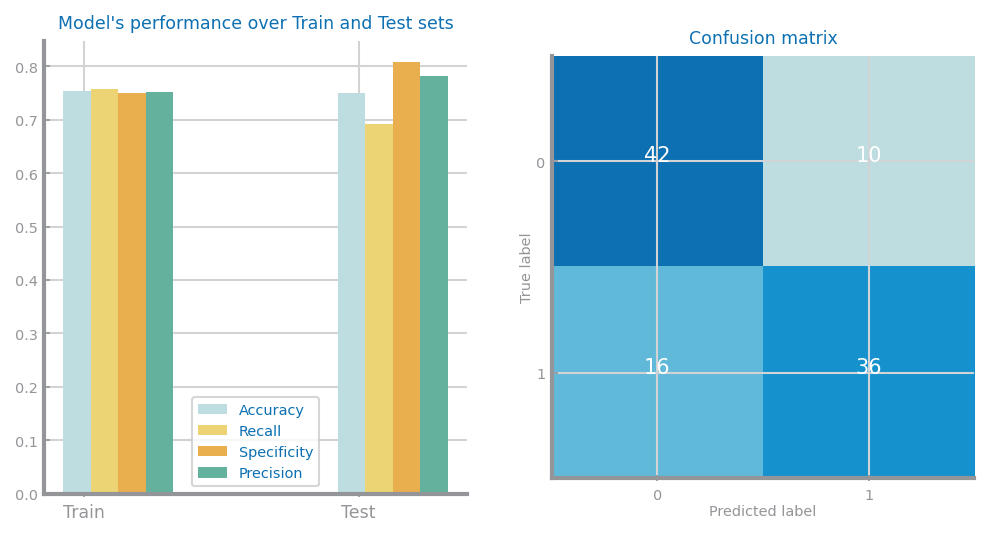

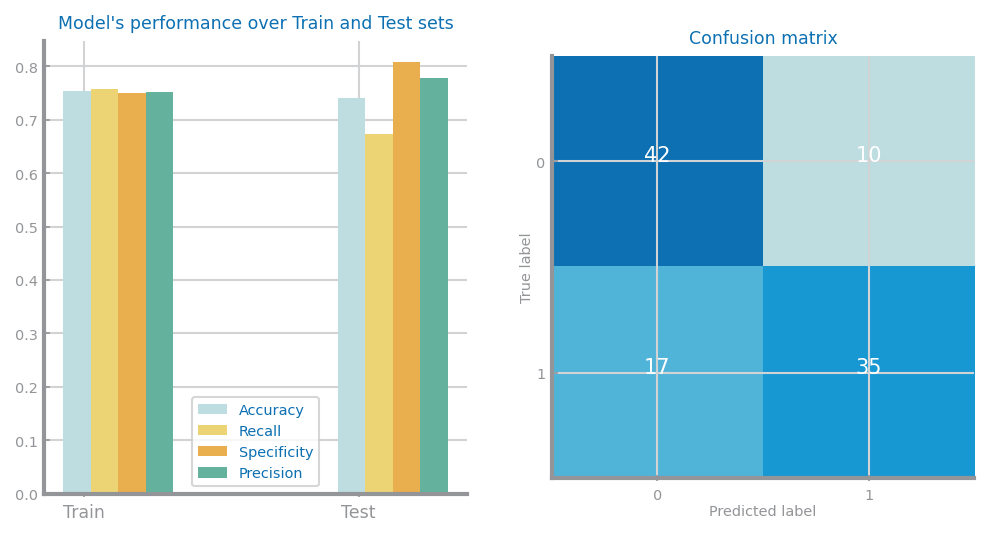

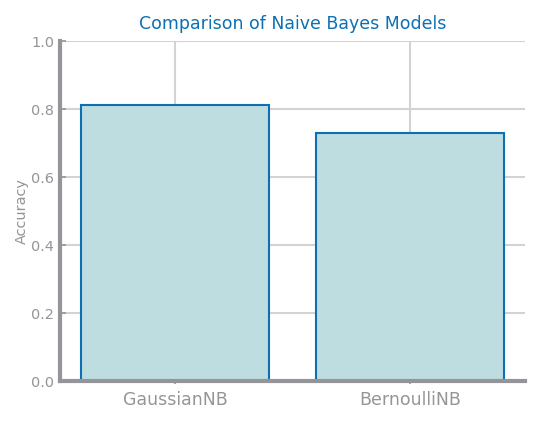

In [2]:
import os

directory = '../../datasets/TO_TEST/HF'

overall_accs = []
datasets = []

n_holdouts = 500

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']
    
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        path = directory + '/' + filename
        print('\n', filename.split('.')[0])
        data: pd.DataFrame = pd.read_csv(path)
        y: np.ndarray = data.pop('DEATH_EVENT').values # Target Variable
        X: np.ndarray = data.values # Values of each feature on each record
        labels = pd.unique(y)
        if(labels[0] == 1):
            temp = labels[0]
            labels[0] = labels[1]
            labels[1] = temp
    
        train_size = 0.7 # % of records used for train (the remainder will be left for test)
        
        gaussian_acc = 0
        bernoulli_acc = 0
        
        for h in range(n_holdouts):

            trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

            clf = GaussianNB()
            clf.fit(trnX, trnY)
            prd_trn = clf.predict(trnX)
            prd_tst_g = clf.predict(tstX)
            
            
            gaussian_acc += metrics.accuracy_score(tstY, prd_tst_g)
            
            clf = BernoulliNB()
            clf.fit(trnX, trnY)
            prd_trn = clf.predict(trnX)
            prd_tst = clf.predict(tstX)
            
            
            bernoulli_acc += metrics.accuracy_score(tstY, prd_tst)
            
        ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst_g)
        ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
            
        
        gaussian_acc /= n_holdouts
        bernoulli_acc /= n_holdouts
        
        plt.figure()
        ds.bar_chart(['GaussianNB', 'BernoulliNB'],[gaussian_acc, bernoulli_acc], title='Comparison of Naive Bayes Models', ylabel='Accuracy', percentage=True)
        plt.show()
        
        
        overall_accs += [max(gaussian_acc, bernoulli_acc)]
        # Dataset name
        datasets += [filename.split('.')[0]]

0     0.853578
1     0.848706
2     0.845022
3     0.841106
4     0.839288
5     0.837271
6     0.831673
7     0.830816
8     0.813204
9     0.812231
10    0.809978
11    0.797867
12    0.787869
13    0.778111
14    0.776756
15    0.776644
16    0.772311
17    0.768822
18    0.766578
19    0.765622
20    0.764622
21    0.764378
dtype: float64


[Text(0, 0, 'HR_S_FMixed_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FImp_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FRFE_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FCorr_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FMixed_outlierTrim_IQS_B'),
 Text(0, 0, 'HF_S_FAnova_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FCorr_outlierTrim_IQS_B'),
 Text(0, 0, 'HF_S_FAnova_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FImp_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FRFE_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_standardized_lasso'),
 Text(0, 0, 'HR_standardized_extra_lasso'),
 Text(0, 0, 'HF_balanced'),
 Text(0, 0, 'HR_standardized_rfe'),
 Text(0, 0, 'HR_standardized_extra_rfe'),
 Text(0, 0, 'HR_standardized_extra_mixed'),
 Text(0, 0, 'HR_standardized_mixed'),
 Text(0, 0, 'HR_standardized_extraTreeClassifier'),
 Text(0, 0, 'HR_standardized_extra'),
 Text(0, 0, 'HR_standardized_corr'),
 Text(0, 0, 'HR_standardized_extra_anova'),
 Text(0, 0, 'HR_standardized_anova')]

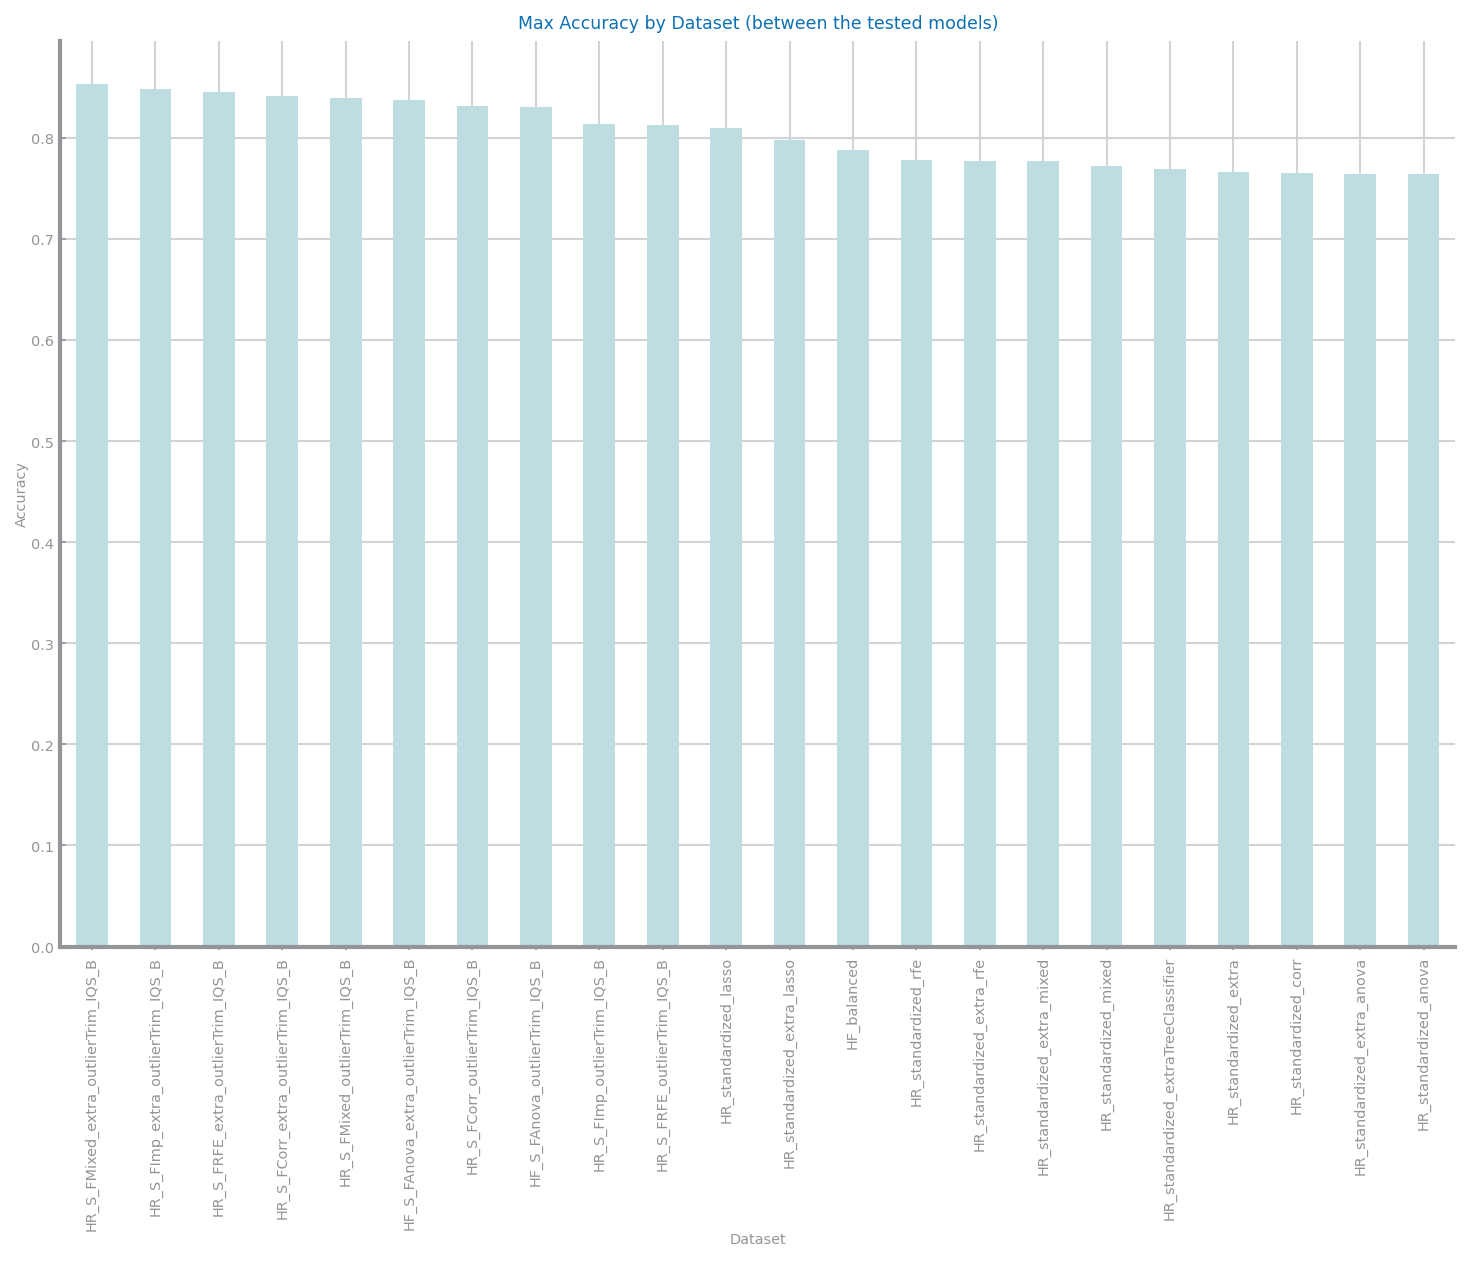

In [3]:
accs = pd.Series(overall_accs)
datasets = list(datasets)

res = {datasets[i]: overall_accs[i] for i in range(len(datasets))}

res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}

accs = pd.Series(list(res.values()))

print(accs)

datasets = list(res.keys())
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = accs.plot(kind='bar')
ax.set_title('Max Accuracy by Dataset (between the tested models)')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(datasets)